
Total number of glucose readings is: 8057

Some of points may be missing, the above number represents the collected readings from start to end date

Remove NaN from the mg/dL column... 
Total actual number of glucose readings is: 7915

Remove NaN from the CHO so we can plot the points of meals...
Total number of meal times: 325

Some of the successive meal readings are redundant and stand for one meal only

Add succesive redundant meal readings (CHO, fat, protein) and store under one recording...

                   Date  mg/dL     CHO (g)  Fat (g)  Protein (g)
0   2008-08-04 19:07:00   96.0  120.777000  23.7115    59.798000
1   2008-08-05 07:02:00  112.0   28.209000   7.0635     6.562000
2   2008-08-05 12:02:00   90.0   30.380000   9.2195    32.022000
3   2008-08-05 16:47:00   84.0   14.310000   0.3800     1.370000
4   2008-08-05 19:52:00  105.0   89.430000  24.7800    37.490000
5   2008-08-06 07:07:00   99.0   21.835000   6.8135     6.007000
6   2008-08-06 12:02:00   97.0   57.61000

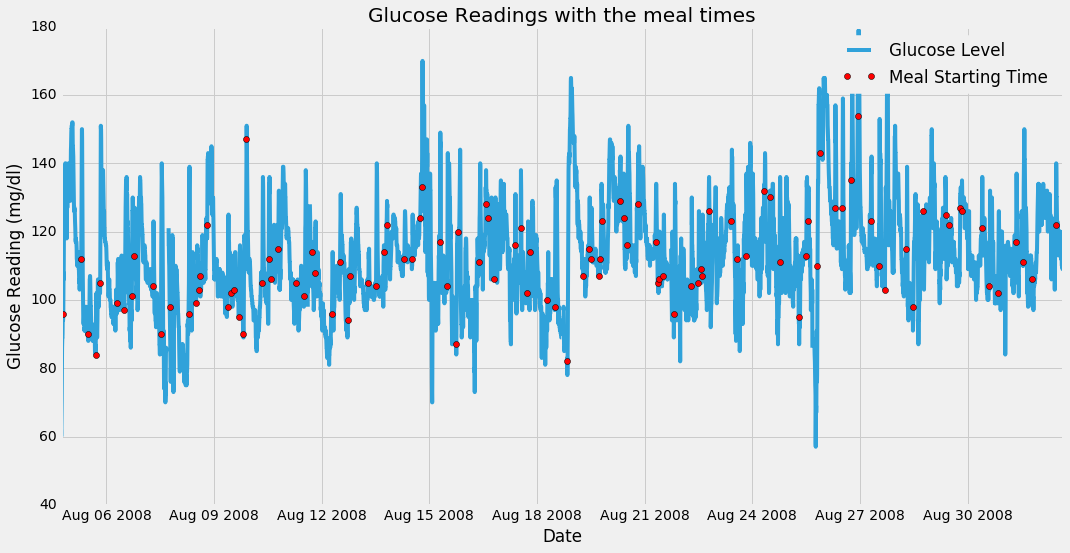

In [2]:
#This was written in Python 2, if you are running Python 3, use a code translation library
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math


%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

#This is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

#_DATA_DIR = r'/Users/Salim/Desktop/Diabetes Project/Input/input'
#_FIG_DIR = r'/Users/Salim/Desktop/Diabetes Project/figures'
_DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
_FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P4.csv')
fields = ["Date", "mg/dL", "CHO (g)", "Fat (g)", "Protein (g)"]
df_P1 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P1 = df_P1.sort(['Date'])

## Matplotlib Variables
_FIG_SIZE = (16, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

#For printing full elements of dataframe or array
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print "\nTotal number of glucose readings is:", df_P1['mg/dL'].size
print "\nSome of points may be missing, the above number represents the collected readings from start to end date"

#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_P1_wonan_mg = df_P1.dropna(subset=['mg/dL'])
print "\nRemove NaN from the mg/dL column...", "\nTotal actual number of glucose readings is:", df_P1_wonan_mg['mg/dL'].size

#Converting object type to float for all of the dataframe
df_P12= pd.DataFrame(df_P1_wonan_mg).convert_objects(convert_numeric=True)

print "\nRemove NaN from the CHO so we can plot the points of meals..."
df_P12 = df_P12.dropna(subset=['CHO (g)'])
print "Total number of meal times:", df_P12['CHO (g)'].size

print "\nSome of the successive meal readings are redundant and stand for one meal only"

df_P12 = df_P12.reset_index(drop=True)

df_P1_meals = copy.deepcopy(df_P12)

print '\nAdd succesive redundant meal readings (CHO, fat, protein) and store under one recording...\n' 
row = 0

#Combine the successive meals: if the minute difference is 5 minutes then combine

i = 0   
while (i <= (df_P12['CHO (g)'].size-1)):
    row = row + 1 
    k = i
    #print "Meal time is:", df_P12.Date[i]
    #keep this row
    if (k == (df_P12['CHO (g)'].size-1)):
        i +=1
        break
    minutesdiff = df_P12.Date[k+1] - df_P12.Date[k]
    while ((minutesdiff.seconds / 60 == 5) and (k < df_P12['CHO (g)'].size-1)):
        #drop this row but add CHO and fats and proteins to values of previous row
        #print "add"
        k = k+1
        df_P1_meals.set_value(row-1,'CHO (g)',df_P1_meals['CHO (g)'][row-1]+df_P1_meals['CHO (g)'][row])
        df_P1_meals.set_value(row-1,'Fat (g)',df_P1_meals['Fat (g)'][row-1]+df_P1_meals['Fat (g)'][row])
        df_P1_meals.set_value(row-1,'Protein (g)',df_P1_meals['Protein (g)'][row-1]+df_P1_meals['Protein (g)'][row])
        df_P1_meals.drop(df_P1_meals.index[row], axis=0, inplace=True)
        df_P1_meals = df_P1_meals.reset_index(drop=True)
        if (k == (df_P12['CHO (g)'].size-1)):
            i == k + 1
            break   
        minutesdiff = df_P12.Date[k+1] - df_P12.Date[k]
#    row = row - 1
    i = k+1               

print_full(df_P1_meals)

df_P1_meals = df_P1_meals.reset_index(drop=True)
print "There are", df_P1_meals['CHO (g)'].size, "recorded meal times.\n" 

print df_P1_meals.head()

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df_P1.Date, df_P1['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df_P1_meals.Date, df_P1_meals['mg/dL'], 'ro', label="Meal Starting Time")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);

In [3]:
def handle_case():
    print "This dataframe does not have missing glucose readings following any meal time"

# output to static HTML file
output_file("Raw_CGM.html")

plot = figure(plot_width=1250, plot_height=600, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df_P1.Date, df_P1['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df_P1.Date, df_P1['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="grey")

good_readings = ColumnDataSource(dict(x=df_P1_meals.Date, y=df_P1_meals['mg/dL'], z=df_P1_meals['CHO (g)'], k = df_P1_meals['Fat (g)'], d = df_P1_meals['Protein (g)']))

g1 = plot.asterisk(x=df_P1_meals.Date, y=df_P1_meals['mg/dL'], legend = 'Meal Recordings', line_color="#f0027f", fill_color=None, line_width=8, source=good_readings)

plot.add_tools(HoverTool( renderers = [g1],  tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('CHO (g)', '@z'),
    ('Fat (g)', '@k'),
    ('Protein (g)', '@d')
]))

plot.xaxis.axis_label = "Date & Time"
plot.yaxis.axis_label = "Glucose Reading (mg/dL)"

show(plot) 

In [4]:
import datetime

df_P1_meals_w_deletion = copy.deepcopy(df_P1_meals)

#variables
incr = 5 #Data was recorded at 5 minutes increments
window_size = 23 #This represents window size based on increments of 5.

del_points_df1 = pd.DataFrame()#Dataframe containing meal to be deleted by this assumption
points_to_del1 = []

for x in range(df_P1_meals_w_deletion['CHO (g)'].size):
    a = df_P1_meals_w_deletion['Date'][x]
    b = a
    count = 0
    for j in range(window_size):
        b += datetime.timedelta(minutes=incr)
        reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']
        try:
            reading.values[0]
        except IndexError:
            #print "Index out of range"
            count +=1 
            continue  
        if (math.isnan(reading.values[0])):
            count +=1
    if (count > ((window_size+1)/3)):
        print "\nThe meal time at", a, "has", count,"missing readings within its {}".format((window_size*5)+5),"minutes. Thus, it will be removed from the dataset.\n"
        #Put this into a dataframe to plot later with different color
        del_points_df1 = del_points_df1.append(df_P1.loc[df_P1['Date'] == a])        
        points_to_del1.extend([x])  

#Remove the above detected points from dataset
df_P1_meals_w_deletion.drop(df_P1_meals_w_deletion.index[points_to_del1],axis=0,inplace=True)
df_P1_meals_w_deletion = df_P1_meals_w_deletion.sort(['Date'])
df_P1_meals_w_deletion = df_P1_meals_w_deletion.reset_index(drop=True)

print "There are", df_P1_meals_w_deletion['CHO (g)'].size, "remaining meal times recordings.\n" 

#print points_to_del1

print_full(df_P1_meals_w_deletion)

There are 111 remaining meal times recordings.

                   Date  mg/dL     CHO (g)  Fat (g)  Protein (g)
0   2008-08-04 19:07:00   96.0  120.777000  23.7115    59.798000
1   2008-08-05 07:02:00  112.0   28.209000   7.0635     6.562000
2   2008-08-05 12:02:00   90.0   30.380000   9.2195    32.022000
3   2008-08-05 16:47:00   84.0   14.310000   0.3800     1.370000
4   2008-08-05 19:52:00  105.0   89.430000  24.7800    37.490000
5   2008-08-06 07:07:00   99.0   21.835000   6.8135     6.007000
6   2008-08-06 12:02:00   97.0   57.610000  18.3300    16.310000
7   2008-08-06 17:02:00  101.0   16.235000   0.3800    18.800000
8   2008-08-06 18:22:00  113.0   56.634000  10.6000    18.505000
9   2008-08-07 07:02:00  104.0   33.207000   7.3955    14.178000
10  2008-08-07 12:17:00   90.0   61.385000   7.5350    16.370000
11  2008-08-07 18:22:00   98.0   81.910000  18.2100   109.610000
12  2008-08-08 06:57:00   96.0   31.667000   6.9755    12.696000
13  2008-08-08 12:02:00   99.0    8.575000

In [20]:
#Note: Make sure to run the previous cell before running this one since the dataframe here used will be overwitten at end of this cell

#variables
incr = 5 #Data was collected at 5 minutes increments- Do not change this
glucose_effect_window = 30 #Minutes food may take to be reflected on the blood glucose
gl_increase_window = 45 #Minutes from the instance where the glucose is reflected on the blood to significant increase###Change this to higher minutes if glucose increases slowly
pre_recording_mins = 10 #Minutes that may have elapsed before patient has recorded the reading
gl_increase = 15 #15mg/dL increase because we are interested in meals for now, later we can include sncaks

########May want to change VARIABLES above for different patients, especially if food takes a while to affect their glucose level############
meal_affect_window = [i for i in np.arange(-(pre_recording_mins), glucose_effect_window+incr, incr)]

compare_window = [j for j in np.arange(incr, gl_increase_window+incr, incr)]

points_to_del = []
del_points_df = pd.DataFrame()#Dataframe containing meal to be deleted by this assumption
low_surrounding_gl = pd.DataFrame()#Dataframe containing points where the glucose will go to take a significant increase, not necessarily the very lowest points
high_surrounding_gl = pd.DataFrame()
offset_low_point_to_meal = []

for x, item in enumerate(df_P1_meals_w_deletion['Date']):
    
    #a = df_P1_meals_w_deletion['Date'][x]
    meal_reading = df_P1.loc[df_P1['Date'] == item]['mg/dL']
    b = item - datetime.timedelta(minutes=pre_recording_mins) 
    keep = 0
    
    for i in meal_affect_window:
        current_reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']
        try:
            current_reading.values[0]
        except IndexError:
            #print "Index out of range"
            b += datetime.timedelta(minutes=incr)   
            continue
            
        if (math.isnan(current_reading.values[0])):
            b += datetime.timedelta(minutes=incr)  
            continue      
            
        c = b
        for k in compare_window:#comparing the point with its following readings in compare window size
            c += datetime.timedelta(minutes=incr)
            compare_reading = df_P1.loc[df_P1['Date'] == c]['mg/dL']
            if ((compare_reading.values[0] - current_reading.values[0]) >gl_increase):
                #print "We should keep this reading"
                #Store this reading on a dataframe of low readings surrounding meals
                low_surrounding_gl = low_surrounding_gl.append(df_P1.loc[df_P1['Date'] == b])
                high_surrounding_gl = high_surrounding_gl.append(df_P1.loc[df_P1['Date'] == c])
                #print "a is:", a, "and b is:", b, "and c is:", c, "and difference between b and c is:", (c - b)
                if (b<=item):
                    offset_low_point_to_meal.extend([int(-(item-b).seconds / 60)])
                    #print "The time elapsed between original meal time and surrounding low point is:", "-", (a-b).seconds / 60 ,"minutes."        
                else:
                    offset_low_point_to_meal.extend([int((b-item).seconds / 60)])
                    #print "The time elapsed between original meal time and surrounding low point is:", "+", (b-a).seconds / 60 ,"minutes."  
                #offset_low_point_to_meal.extend([offset_seconds])
                keep = 1  
                break
                
        if (keep == 1):
            break
        b += datetime.timedelta(minutes=incr)    
        
        if (i == meal_affect_window[-1]):
            #print "The meal reading taken at" ,a, "should be deleted."
            #Put this into an dataframe to plot with different color
            del_points_df = del_points_df.append(df_P1.loc[df_P1['Date'] == item])
            #Also remove this from dataset   
            points_to_del.extend([x])                     

#print "\nThe dataframe of the points to be deleted is:\n", del_points_df 

#print (points_to_del)

print "\nThere are", len(points_to_del), "meal recordings that will be deleted."

df_P1_meals_w_deletion.drop(df_P1_meals_w_deletion.index[points_to_del],axis=0,inplace=True)
df_P1_meals_w_deletion = df_P1_meals_w_deletion.sort(['Date'])
df_P1_meals_w_deletion = df_P1_meals_w_deletion.reset_index(drop=True)

print "\nThere are", df_P1_meals_w_deletion['CHO (g)'].size, "remaining meal times recordings." 

low_surrounding_gl = low_surrounding_gl.sort(['Date'])
low_surrounding_gl = low_surrounding_gl.reset_index(drop=True)

high_surrounding_gl = high_surrounding_gl.sort(['Date'])
high_surrounding_gl = high_surrounding_gl.reset_index(drop=True)


There are 0 meal recordings that will be deleted.

There are 63 remaining meal times recordings.


In [21]:
gl_rise_window = [j for j in np.arange(0, gl_increase_window+incr, incr)]

offset_lowest_point_to_meal = []
highpoints_after_meal = []
points_to_readjust = []

readjust_points_df = pd.DataFrame()
surrounding_lowest_points_df = pd.DataFrame()
surrounding_high_points_df = pd.DataFrame()

print "Readjusting surrounding lowest meal points..."
print "\nSurrounding lowest meal points are saved under --> surrounding_lowest_points_df"
for x,a in enumerate(low_surrounding_gl['Date']):
    b = a
    min_reading = df_P1.loc[df_P1['Date'] == a]['mg/dL']
    lowest_pt_index = 0
    highest_pt_index = 0
    #print "The surrounding low value has a date of", a
    for i,y in enumerate(gl_rise_window):
        #get the lowest point within the full window
        current_reading = df_P1.loc[df_P1['Date'] == b]['mg/dL'].values[0]
        try:
            current_reading
        except IndexError:
            print "Index out of range"
            b += datetime.timedelta(minutes=incr)   
            continue
        
        if (math.isnan(current_reading)):
            b += datetime.timedelta(minutes=incr)  
            continue
            
        #print "The current lowest reading is:", min_reading.values[0], "and compared reading is:", current_reading, "and y is:", y
        if (current_reading<min_reading.values[0]): 
            c = b  
            for k in compare_window:#comparing the point with its following readings in compare window size
                c += datetime.timedelta(minutes=incr)
                compare_reading = df_P1.loc[df_P1['Date'] == c]['mg/dL']
                if ((compare_reading.values[0] - current_reading) >gl_increase):
                    #print "Readjusting the lowest meal point at date", a, "whihch has a glucose of", df_P1.loc[df_P1['Date'] == a]['mg/dL'].values[0], "with the point at date", b, "which has a glucose reading of", df_P1.loc[df_P1['Date'] == b]['mg/dL'] .values[0]

                    min_reading = df_P1.loc[df_P1['Date'] == b]['mg/dL'] 
                    lowest_pt_index = y
                    
                    #we will use these points to find the actaul peak
                    high_surrounding_gl.drop(high_surrounding_gl.index[x],axis=0,inplace=True) 
                    high_surrounding_gl = high_surrounding_gl.append(df_P1.loc[df_P1['Date'] == c])
                    high_surrounding_gl = high_surrounding_gl.sort(['Date'])
                    high_surrounding_gl = high_surrounding_gl.reset_index(drop=True)
                    break

        b += datetime.timedelta(minutes=incr) 
    #print x,": At date", a, "the lowest point is", min_reading.values[0], "of index", lowest_pt_index, "and the highest point is", max_reading.values[0], "of index",highest_pt_index 
    offset_lowest_point_to_meal.extend([lowest_pt_index])

    surrounding_lowest_points_df = surrounding_lowest_points_df.append(df_P1.loc[df_P1['Date'] == (a + datetime.timedelta(minutes=int(lowest_pt_index)))]) 
    surrounding_high_points_df = surrounding_high_points_df.append(df_P1.loc[df_P1['Date'] == (a + datetime.timedelta(minutes=int(lowest_pt_index)))]) 
    
surrounding_lowest_points_df = surrounding_lowest_points_df.sort(['Date'])
surrounding_lowest_points_df = surrounding_lowest_points_df.reset_index(drop=True)

#The real time difference between the lowest point and meal time is the addition of difference between meal time and low surrounding point + between low surrounding point and lowest surrounding point
        
offset_meal2increase = np.add(offset_lowest_point_to_meal , offset_low_point_to_meal)    
    
#print offset_meal2increase

print "\nThe mean of the time elapsed between recorded meal time and convenient surrounding lowest point is %.2f" %np.mean(offset_meal2increase), "minutes \nwith a std of %.2f" %np.std(offset_meal2increase), "minutes."

min_minutes = np.absolute(np.min(offset_meal2increase))
max_minutes = np.max(offset_meal2increase)

# n, bins, patches = plt.hist(offset_meal2increase, (min_minutes+max_minutes)/5, facecolor='blue', alpha=1)
# plt.title('Minutes between recorded meal time and lowest point with glucose increase')
# plt.xlabel('Minutes')
# plt.ylabel('# of meals')
# plt.show()


#print "size of low meal points is:", low_surrounding_gl['Date'].size
#print "size of high meal points is:", high_surrounding_gl['Date'].size

Readjusting surrounding lowest meal points...

Surrounding lowest meal points are saved under --> surrounding_lowest_points_df

The mean of the time elapsed between recorded meal time and convenient surrounding lowest point is -1.59 minutes 
with a std of 11.58 minutes.


In [22]:
#Last non empty row of patient data
nonempty_P1_readings = df_P1[pd.notnull(df_P1['Date'])]

#print nonempty_P1_readings.iloc[-1,nonempty_P1_readings.columns.get_loc('Date')]

In [23]:
#Step 1

gl_decrease = 15 #15mg/dl of glucose drop (we noticed from the data that 10mg/dl would be too low and may result in not finding the highest peak after meal)

minutes2peak = 60#Minutes to reach the peak after meal
gl_decrease_window = 120 #Minutes it takes for a significant glucose decrease after meal, it may take long time for glucose to go down, few hours

up2peak_window = [j for j in np.arange(0, minutes2peak+incr, incr)]
compare_window = [j for j in np.arange(incr, gl_decrease_window+incr, incr)]

#print up2peak_window

afterpeak_lowgl_df = pd.DataFrame()#This dataframe contains the points after the glucose drop following the peak
lowpoint_to_del_df = pd.DataFrame()#Dataframe contaning any meal recording to be deleted because they do not have a significant nearby glucose drop after the increase
peak_points_df = pd.DataFrame()#Dataframe containing peak points following meal times
lowpoint_to_del = []

for x, item in enumerate(high_surrounding_gl['mg/dL']):   
    a = high_surrounding_gl['Date'][x]   
    keep = 0
    b= a

    for i in up2peak_window:

        current_reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']
        #print "**Following reading:", current_reading.values[0], "at the date of", b          
        c = b
        for k in compare_window:#comparing the point with its following readings in compare window size
            c += datetime.timedelta(minutes=incr)
            compare_reading = df_P1.loc[df_P1['Date'] == c]['mg/dL']
            #print "***Compared reading reading:", compare_reading.values[0], " at the date of", c  
            if ((current_reading.values[0] - compare_reading.values[0]) > gl_decrease):#significant glucose drop has been detected
                #Store this reading on a dataframe of points detecting glucose drop after peak
                #print "found it"
                afterpeak_lowgl_df = afterpeak_lowgl_df.append(df_P1.loc[df_P1['Date'] == c])
                keep = 1
                break
                
        if (keep == 1):
            break   
    
        if (i == up2peak_window[-1]):
            print "Could not detect a significant glucose drop after this meal recording", df_P1_meals_w_deletion['Date'][x], ". It is suggested to delete it"  
            lowpoint_to_del.extend([x])  
            lowpoint_to_del_df = lowpoint_to_del_df.append(df_P1.loc[df_P1['Date'] == a])
            
        b += datetime.timedelta(minutes=incr)    

#Drop x from the "all the meals" dataframe and lowest surrounding dataframe as well
df_P1_meals_w_deletion.drop(df_P1_meals_w_deletion.index[lowpoint_to_del],axis=0,inplace=True)  
df_P1_meals_w_deletion = df_P1_meals_w_deletion.reset_index(drop=True)
 

surrounding_lowest_points_df.drop(surrounding_lowest_points_df.index[lowpoint_to_del],axis=0,inplace=True)  
surrounding_lowest_points_df = surrounding_lowest_points_df.reset_index(drop=True)

offset_meal2increase = [item for index, item in enumerate(offset_meal2increase) if index not in lowpoint_to_del] 
#print "offset_meal2increase size is:", len(offset_meal2increase)

afterpeak_lowgl_df = afterpeak_lowgl_df.reset_index(drop=True)
lowpoint_to_del_df = lowpoint_to_del_df.reset_index(drop=True)

#print "number of meals are:", df_P1_meals_w_deletion['CHO (g)'].size

#print "afterpeak_lowgl_df size is:", afterpeak_lowgl_df['CHO (g)'].size

#Step 2

#print "\nThe dataframe of the points after detecting a glucose drop:\n", afterpeak_lowgl_df 
def drange(start, stop, step):
    while start <= stop:
            yield start
            start += step
            
#print df_P1.iloc[-2]['Date']
    
for x, item in enumerate(afterpeak_lowgl_df['mg/dL']):
    #print "At the meal of date", df_P1_meals_w_deletion['Date'][x], "the lowest point is at:", surrounding_lowest_points_df['Date'][x] , "and low after peak is at:", afterpeak_lowgl_df['Date'][x]  
    meal_recording = df_P1_meals_w_deletion['Date'][x]
    #print "x is:", x , "and its date is:", afterpeak_lowgl_df['Date'][x]   
    a = surrounding_lowest_points_df['Date'][x]   
    current_reading = df_P1.loc[df_P1['Date'] == a]['mg/dL'].values[0]
    lowpt_after_peak = afterpeak_lowgl_df['Date'][x]   
    b= a
    #difference in minutes between lowest point and the point after glucose drop following peak
    window_peak = (lowpt_after_peak-a).seconds / 60
    #print window_peak
    peak_index = 0

    for i in drange(5,window_peak,5):        
        b += datetime.timedelta(minutes=incr)
        if (b <= nonempty_P1_readings.iloc[-1,nonempty_P1_readings.columns.get_loc('Date')]):
            incrt_reading = df_P1.loc[df_P1['Date'] == b]['mg/dL'].values[0]   
            if (math.isnan(incrt_reading)):
                b += datetime.timedelta(minutes=incr)  
                continue

            if (incrt_reading > current_reading):
                current_reading = incrt_reading
                peak_index = i
    #print "the peak index is offseted by", peak_index, "minutes from the lowest reading"        
    c = a + datetime.timedelta(minutes=int(peak_index))
    
    peak_points_df = peak_points_df.append(df_P1.loc[df_P1['Date'] == c])

surrounding_lowest_points_df = surrounding_lowest_points_df.reset_index(drop=True) 

peak_points_df = peak_points_df.reset_index(drop=True)

#print_full(peak_points_df['Date'])  

#print_full(surrounding_lowest_points_df)

#print peak_points_df 
peak_elapsed_time = []

#Need to make list with elapsed time between peak and meal recording for plotting, in minutes
for x, item in enumerate(peak_points_df['mg/dL']): 
    meal_recording = df_P1_meals_w_deletion['Date'][x]
    peak_reading = peak_points_df['Date'][x]      
    if (peak_reading>=meal_recording):
        topeakduration = (peak_reading-meal_recording).seconds / 60
    else:
        topeakduration = -(meal_recording-peak_reading).seconds / 60       
    peak_elapsed_time.append(int(topeakduration))
    
print "There are", surrounding_lowest_points_df['Date'].size, "remaining readings."


There are 63 remaining readings.


In [24]:
print "For meal recordings that are close enough and end up having the same peak, remove the latest and keep the first. However, add the meal sizes together.\n\n"

remove_index = peak_points_df['Date'].size #setting this to some value it will never be so we can overwrite it later
remove_pts = []
for i in range(peak_points_df['Date'].size):
    if ((i < peak_points_df['Date'].size -1) and (peak_points_df['Date'][i] == peak_points_df['Date'][i+1]) and (i != remove_index)):
        print "There are succesive meal readings which have the same peak.", "The dates of the two readings are:", df_P1_meals_w_deletion['Date'][i], "and", df_P1_meals_w_deletion['Date'][i+1]
        total_mealCHO = df_P1_meals_w_deletion['CHO (g)'][i] + df_P1_meals_w_deletion['CHO (g)'][i+1]
        total_mealfat = df_P1_meals_w_deletion['Fat (g)'][i] + df_P1_meals_w_deletion['Fat (g)'][i+1]
        total_mealProtein = df_P1_meals_w_deletion['Protein (g)'][i] + df_P1_meals_w_deletion['Protein (g)'][i+1]
        
        #Need to replace main dataframe containing the meal times, replace the row with the new meal sizes
        df_P1_meals_w_deletion.set_value(i, 'CHO (g)', total_mealCHO)
        df_P1_meals_w_deletion.set_value(i, 'Fat (g)', total_mealfat)
        df_P1_meals_w_deletion.set_value(i, 'Protein (g)', total_mealProtein)
        
        remove_index = i+1
        remove_pts.append(remove_index)
#remove the next rows with the same peak points from all the dataframes
df_P1_meals_w_deletion.drop(df_P1_meals_w_deletion.index[remove_pts], axis=0,inplace=True)
df_P1_meals_w_deletion = df_P1_meals_w_deletion.sort(['Date'])
df_P1_meals_w_deletion = df_P1_meals_w_deletion.reset_index(drop=True)

surrounding_lowest_points_df.drop(surrounding_lowest_points_df.index[remove_pts], axis=0,inplace=True)
surrounding_lowest_points_df = surrounding_lowest_points_df.sort(['Date'])
surrounding_lowest_points_df = surrounding_lowest_points_df.reset_index(drop=True)

peak_points_df.drop(peak_points_df.index[remove_pts], axis=0,inplace=True)
peak_points_df = peak_points_df.sort(['Date'])
peak_points_df = peak_points_df.reset_index(drop=True)

#print "remove points list is:", remove_pts

#print "offset_meal2increase is", offset_meal2increase, "of the size", len(offset_meal2increase)

    #when we delete we change index so change this
for i in range(len(remove_pts)):
    index = remove_pts[i]
    #print "offset_meal2increase[index]", offset_meal2increase[index-i]
    del offset_meal2increase[index-i]
    del peak_elapsed_time[index-i]

print "There are ", df_P1_meals_w_deletion['Date'].size, "meals remaining."

For meal recordings that are close enough and end up having the same peak, remove the latest and keep the first. However, add the meal sizes together.


There are  63 meals remaining.


In [25]:
nonempty_readings = df_P1[pd.notnull(df_P1['Date'])]
last_row_date = nonempty_readings.iloc[-1, nonempty_readings.columns.get_loc('Date')]
#print last_row_date

gl_2nd_increase = 15 #second increase of 10mg/dl
after_reading = 300 #size of the plot after meal time in minutes
stop_plot_date = []

#print "surrounding_lowest_points_df size is ", surrounding_lowest_points_df['Date'].size

for x in range(surrounding_lowest_points_df['Date'].size):
    #print "Elapsed time from meal to peak is", peak_elapsed_time[x]
    stop = 0
    peak_gl_Date = peak_points_df['Date'][x]
    for d in drange(5,(after_reading-peak_elapsed_time[x]), 5):
     
        #current glucose level
        peak_gl_Date += datetime.timedelta(minutes=incr) 
        if ((peak_gl_Date - last_row_date).days >= 0 and (peak_gl_Date - last_row_date).seconds > 0):
            break
        
        current_gl_Date = peak_gl_Date
        compared_gl_date = peak_gl_Date
        current_gl = df_P1.loc[df_P1['Date'] == current_gl_Date]['mg/dL'].values[0] 
        
        for l in drange(5, gl_increase_window, 5):
            compared_gl_date += datetime.timedelta(minutes=incr)
            #print "compared_gl_date is", compared_gl_date, "and the difference is in days", (compared_gl_date - last_row_date).days, "and in seconds",(compared_gl_date - last_row_date).seconds 
            if ((compared_gl_date - last_row_date).days >= 0 and (compared_gl_date - last_row_date).seconds > 0):
                #print "Reached end"
                break
            else:    
                compared_gl = df_P1.loc[df_P1['Date'] == compared_gl_date]['mg/dL'].values[0]  
###            
            if (compared_gl - current_gl > gl_2nd_increase):
                #Find lowest point between current_gl and compared_gl
                lowest2nd_pt = current_gl
                lowest2nd_pt_date = current_gl_Date
                current_gl_temp_date = current_gl_Date
                for s in drange (5,(compared_gl_date - current_gl_Date).seconds / 60,5):
                    current_gl_temp_date += datetime.timedelta(minutes=incr)
                    current_gl_temp = df_P1.loc[df_P1['Date'] == current_gl_temp_date]['mg/dL'].values[0]  
                    if (current_gl_temp < lowest2nd_pt):
                        lowest2nd_pt = current_gl_temp
                        lowest2nd_pt_date = current_gl_temp_date
                stop = 1
                #Need to stop the plot at this current_gl date, so let's save it
                break
        if (stop == 1):
            #print "Stop here", current_gl_Date
            stop_plot_date.append(lowest2nd_pt_date)
            break
        if (d == after_reading-peak_elapsed_time[x]):
            #print "All the way"
            stop_plot_date.append(current_gl_Date)

#print stop_plot_date    

In [26]:
print "the length of the stop_plot_date is", len(stop_plot_date)

print "the size of meals is", df_P1_meals_w_deletion['CHO (g)'].size

print "the size of surrounding_lowest_points_df is", surrounding_lowest_points_df['CHO (g)'].size

Plot_window = [i for i in np.arange(-(pre_recording_mins), after_reading+incr, incr)]

#This includes all steps for correct plotting
def Plot_extraction_v2(df_P1_w_all_deletion, df_all_plots_v2):
    for x in range(df_P1_w_all_deletion['CHO (g)'].size):
        #save the readings surrounding every meal time in a new dataframe
        a = df_P1_w_all_deletion['Date'][x]
        
        #Check if it's last reading
        if (x<((df_P1_w_all_deletion['CHO (g)'].size))-1):
            a1 = df_P1_w_all_deletion['Date'][x+1]          
            
            #c is the date from the dataframe that contains where glucose starts increasing again AFTER the peak
                      
            b = a - datetime.timedelta(minutes=pre_recording_mins)
            reading_list = []
            for j in Plot_window:
                reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']
                c = stop_plot_date[x]  #Stop at this date because there is another glucose increase right after it       
                try:
                    reading.values[0]
                except IndexError:
                    #print "Index out of range"
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)   
                    continue
                #Check to include points only up to next meal time, else put nan on that array so they are not plotted
                if ((a1 - b).total_seconds() < 0 ):#readings_distance = (a1 -a).total_seconds()/60 #The elapsed time in minutes 
                    #print "Elapsed time on this iteration is less than the full window time", x
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue
                elif((c - b).total_seconds() < 0 ):    
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue                  
                else:
                    #store this value on the jth column of xth row of the new dataframe
                    reading_list.append(reading.values[0])
                    b += datetime.timedelta(minutes=incr)
        else: 
            #plot readings until next meal, need to replace that row
            b = a - datetime.timedelta(minutes=pre_recording_mins)
            reading_list = []
            for j in Plot_window:
                reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']       
                try:
                    reading.values[0]
                except IndexError:
                    #print "Index out of range"
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)   
                    continue
                #store this value on the jth column of xth row of the new dataframe
                reading_list.append(reading.values[0])
                b += datetime.timedelta(minutes=incr)
        #print reading_list
        #print df_all_plots.shape
        df_all_plots_v2.loc[x]=reading_list
    #print df_all_plots_v2

the length of the stop_plot_date is 63
the size of meals is 63
the size of surrounding_lowest_points_df is 63


In [27]:
def plotting(df_all_plots_v2, df_P1_w_all_deletion):
   
    plt.figure(figsize=(20,12))
    for j in range(2,3):
    #for j in range(len(df_P1_w_all_deletion)):
        row = df_all_plots_v2.iloc[j]
        row.plot(label='')
        #row.plot(label='Meal Time at {}'.format(df_P1_w_all_deletion['Date'][j]))
        #print df_all_plots_v2.iloc[j]
        if (j==0):
            #Recorded meal time reading
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=10, label ='Meal Recordings')
            #Lowest surrounding point of increase

            plt.plot(offset_meal2increase[j], surrounding_lowest_points_df['mg/dL'][j], 'b^', markersize=15, label ='Glucose Increase Points')
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=20, label ='Glucose Peaks')
        else:
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=10)
            plt.plot(offset_meal2increase[j], surrounding_lowest_points_df['mg/dL'][j], 'b^', markersize=15)
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=20)      
        

    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Post-meal BG variation of Different Meals'.format(after_reading)
    plt.title(title);

    #Uncomment below to save plot
    #plt.savefig('Patient_1_Plotsaftermeal_iter0to5.png')

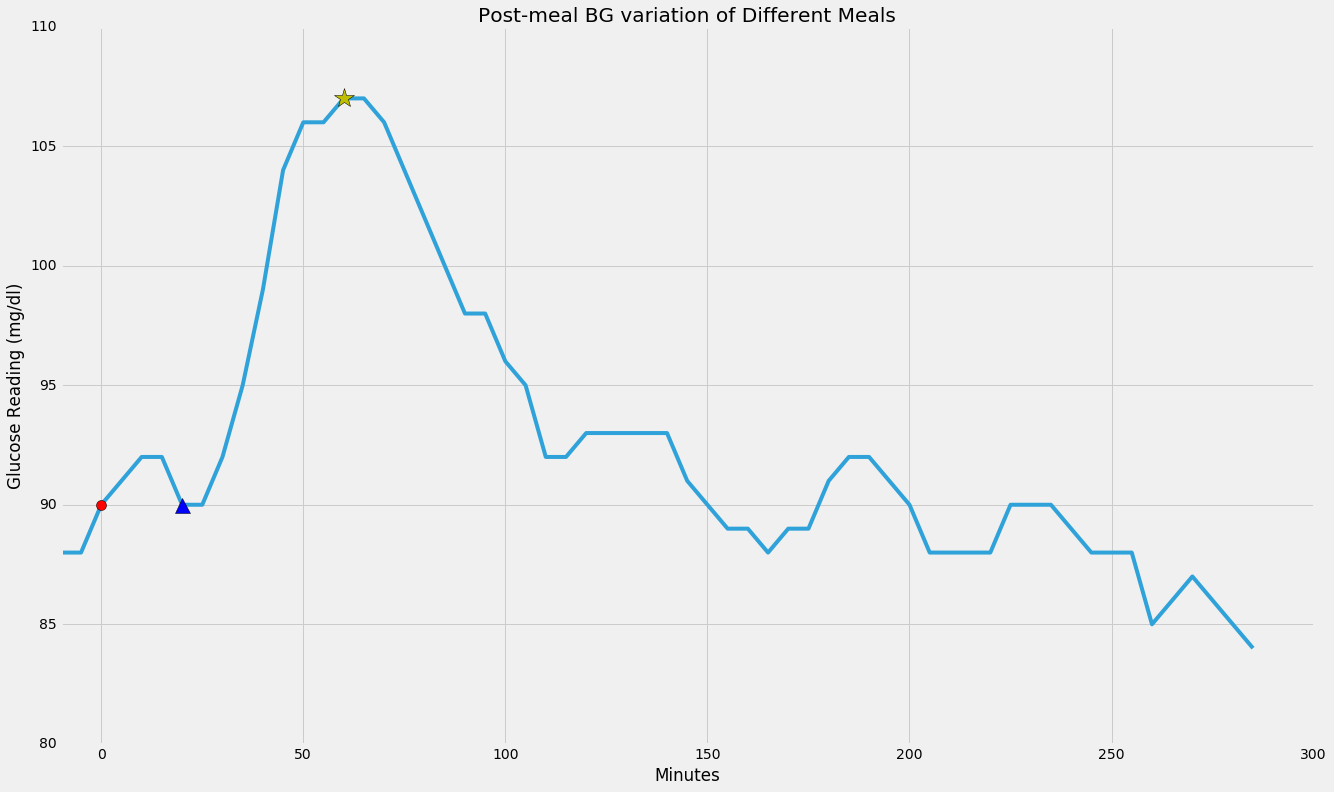

In [28]:
df_all_plots_v2 = pd.DataFrame(columns=Plot_window)

Plot_extraction_v2(df_P1_meals_w_deletion, df_all_plots_v2)
plotting(df_all_plots_v2, df_P1_meals_w_deletion)

#print_full(df_P1_meals_w_deletion)

In [29]:
#Defining the exponential fuction
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

This 0 has a short duration after peak. Thus, it is excluded.
This 3 has a short duration after peak. Thus, it is excluded.


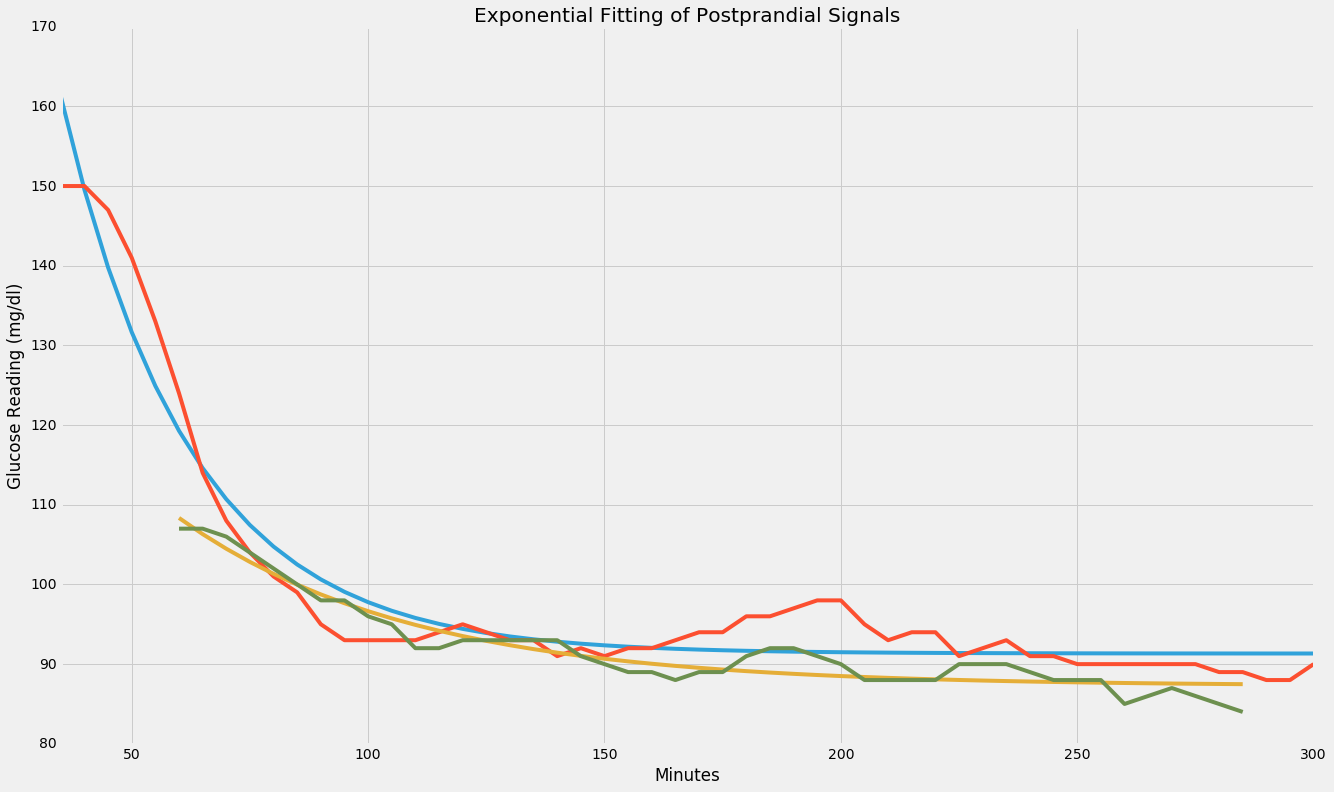

In [30]:
from scipy.optimize import curve_fit

def plotting_afterpeak(df_all_plots_v2, df_P1_w_all_deletion):
   
    plt.figure(figsize=(20,12))
    for j in range(0,4):
    #for j in range(len(df_P1_w_all_deletion)):
        #plot_offset = (pre_recording_mins + offset_meal2increase[1])/5
        peak_start_index= (peak_elapsed_time[j]+pre_recording_mins)/5
        
        a = df_P1_w_all_deletion['Date'][j]
        #print a
        c = stop_plot_date[j]
        #print c
        signal_span = (c - a).total_seconds()/60
 
        #exclude short signals, which have short signal span after peak
        signal_after_peak = signal_span - peak_elapsed_time[j]
        
        if (signal_after_peak<60):
            print "This", j , "has a short duration after peak. Thus, it is excluded."
            continue
        else:
        
            #print "signal span is:", signal_span
            #print "index of peak ", peak_start_index

            row = (df_all_plots_v2.iloc[j])[peak_start_index:int((signal_span+pre_recording_mins)/5)+1]

            xaxis = row.index.values
            xdata = 1 + (xaxis - peak_elapsed_time[j])/5
            #print "row is :", row
            #print xdata 

            #provide initial starting variables so it helps the curve fit to converge correctly and faster
            popt, pcov = curve_fit(func, xdata, row, p0=[1, 1, 60])
            plt.plot(xaxis, func(xdata, *popt))     

            #row.plot(color="red", label='')     
            row.plot(label='')  

    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Exponential Fitting of Postprandial Signals'.format(after_reading)
    plt.title(title);

    #Uncomment below to save plot
    #plt.savefig('Patient_1_Plotsaftermeal_iter0to5.png')

plotting_afterpeak(df_all_plots_v2, df_P1_meals_w_deletion)

In [31]:
print np.linspace(0, 4, 50)

[ 0.          0.08163265  0.16326531  0.24489796  0.32653061  0.40816327
  0.48979592  0.57142857  0.65306122  0.73469388  0.81632653  0.89795918
  0.97959184  1.06122449  1.14285714  1.2244898   1.30612245  1.3877551
  1.46938776  1.55102041  1.63265306  1.71428571  1.79591837  1.87755102
  1.95918367  2.04081633  2.12244898  2.20408163  2.28571429  2.36734694
  2.44897959  2.53061224  2.6122449   2.69387755  2.7755102   2.85714286
  2.93877551  3.02040816  3.10204082  3.18367347  3.26530612  3.34693878
  3.42857143  3.51020408  3.59183673  3.67346939  3.75510204  3.83673469
  3.91836735  4.        ]


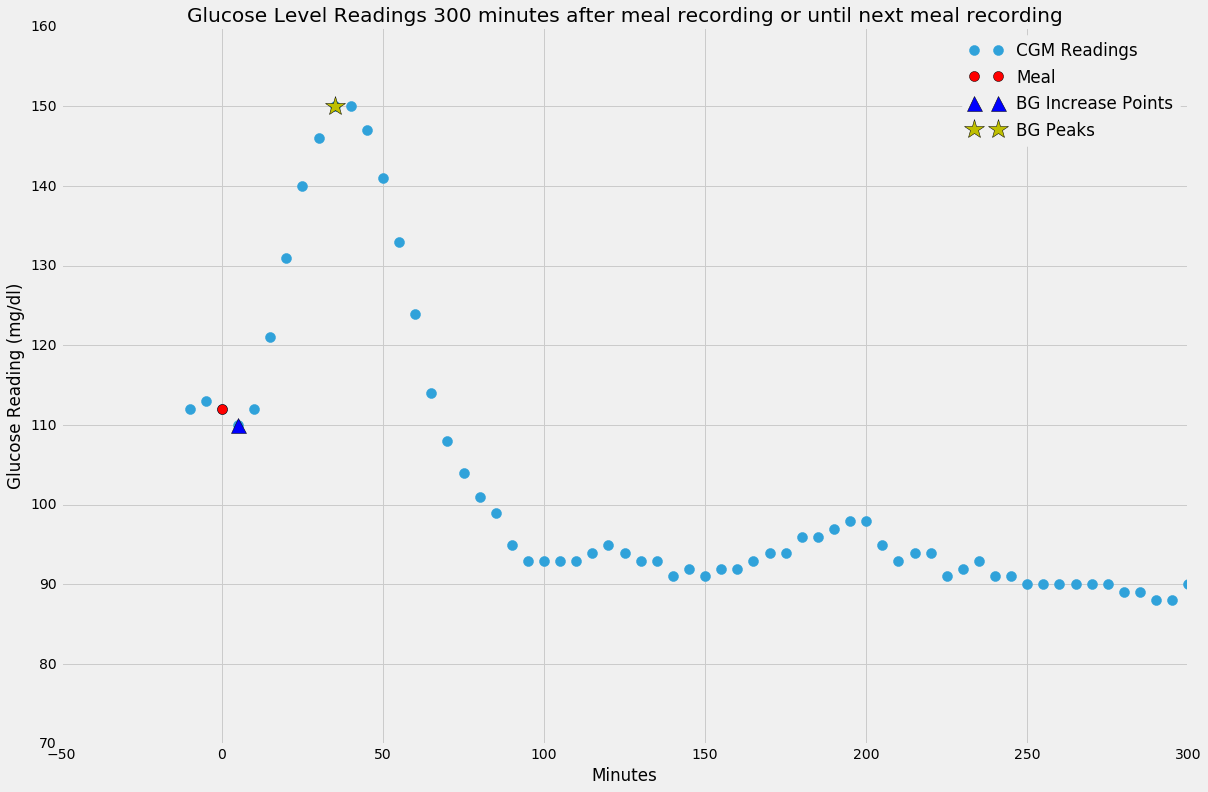

In [32]:
def plottingg(df_all_plots_v2, df_P1_w_all_deletion):
   
    plt.figure(figsize=(18,12))
    plt.ylim(ymax = 160, ymin = 70)
    for j in range(1,2):
    #for j in range(len(df_P1_w_all_deletion)):
        row = df_all_plots_v2.iloc[j]
        #row.plot(x_new, meal_pts, '.', markersize=10) 
        #print row
        #print len(row)
        plot_indeces = map(lambda v : ((v * 5)-pre_recording_mins), range(63))
        plt.plot(plot_indeces,row, '.', markersize=20, label ='CGM Readings') 
        #row.plot(label='Meal Time at {}'.format(df_P1_w_all_deletion['Date'][j]))
        
        if (j==0):
            #Recorded meal time reading
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=10, label ='Meal')
            #Lowest surrounding point of increase

            plt.plot(offset_meal2increase[j], surrounding_lowest_points_df['mg/dL'][j], 'b^', markersize=15, label ='BG Increase Points')
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=20, label ='BG Peaks')
        else:
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=10, label ='Meal')
            plt.plot(offset_meal2increase[j], surrounding_lowest_points_df['mg/dL'][j], 'b^', markersize=15, label ='BG Increase Points')
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=20, label ='BG Peaks')     
        

    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Glucose Level Readings {} minutes after meal recording or until next meal recording'.format(after_reading)
    plt.title(title)


    #Uncomment below to save plot
    #plt.savefig('Patient_1_Plotsaftermeal_iter0to5.png')
    
df_all_plots_v2 = pd.DataFrame(columns=Plot_window)
Plot_extraction_v2(df_P1_meals_w_deletion, df_all_plots_v2)
plottingg(df_all_plots_v2, df_P1_meals_w_deletion)

#print_full(df_P1_meals_w_deletion)




offset minutes until increase point: 5
5      110.0
10     112.0
15     121.0
20     131.0
25     140.0
30     146.0
35     150.0
40     150.0
45     147.0
50     141.0
55     133.0
60     124.0
65     114.0
70     108.0
75     104.0
80     101.0
85      99.0
90      95.0
95      93.0
100     93.0
105     93.0
110     93.0
115     94.0
120     95.0
125     94.0
130     93.0
135     93.0
140     91.0
145     92.0
150     91.0
155     92.0
160     92.0
165     93.0
170     94.0
175     94.0
180     96.0
185     96.0
190     97.0
195     98.0
200     98.0
205     95.0
210     93.0
215     94.0
220     94.0
225     91.0
230     92.0
235     93.0
240     91.0
245     91.0
250     90.0
255     90.0
260     90.0
265     90.0
270     90.0
275     90.0
280     89.0
285     89.0
290     88.0
295     88.0
300     90.0
Name: 1, dtype: float64
without nan 5     110.0
10    112.0
15    121.0
20    131.0
25    140.0
30    146.0
35    150.0
40    150.0
45    147.0
50    141.0
55    133.0
60    124.0
6

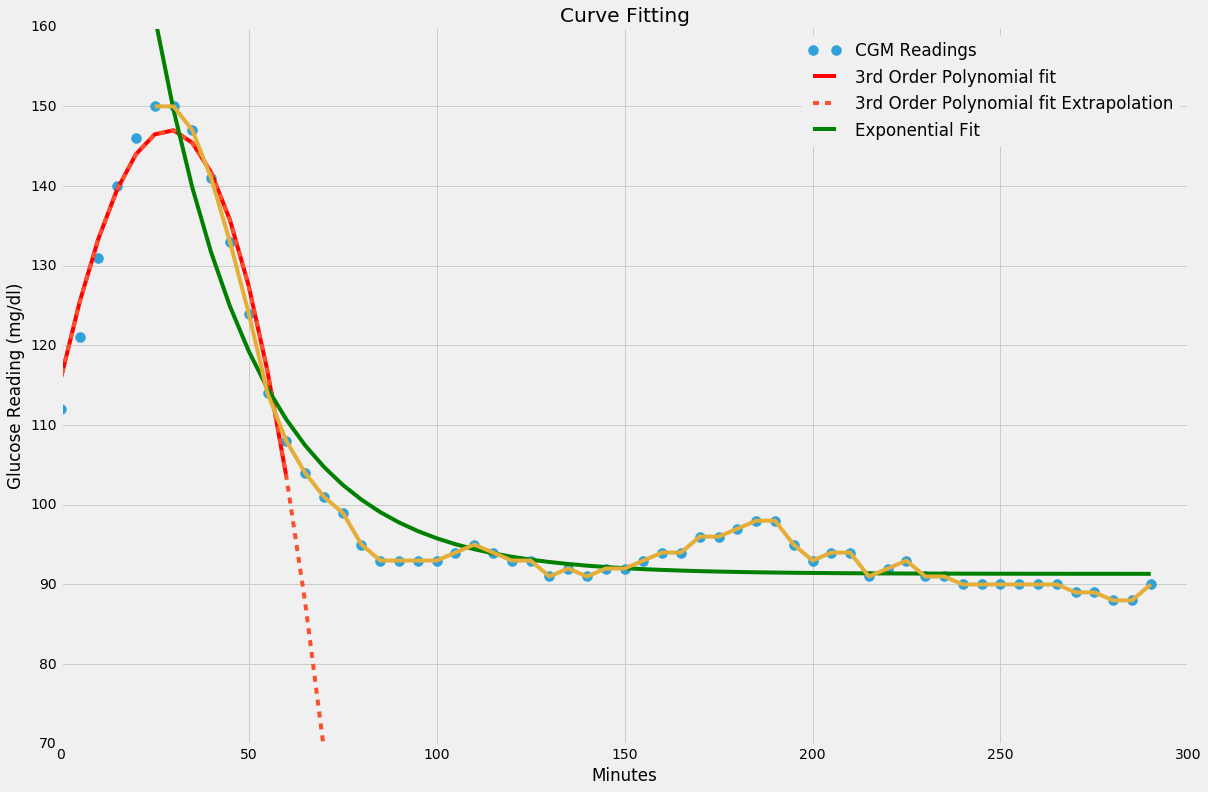

In [35]:
plt.figure(figsize=(18,12))
plt.xlim(xmax = 300, xmin = 0)
plt.ylim(ymax = 160, ymin = 70)
###############Curve fitting one polynomial### some variables are hard coded, to be changed to handle all signals
plot_indeces_all = map(lambda v : v * 5, range(len(df_all_plots_v2.iloc[1])))
single_row = df_all_plots_v2.iloc[1]
#print single_row
print "offset minutes until increase point:", offset_meal2increase[1]
plot_offset = (pre_recording_mins + offset_meal2increase[1])/5
print single_row[plot_offset:]

data2 = single_row[plot_offset:][~np.isnan(single_row[plot_offset:])]
#print "without nan", data2

data3 = single_row[plot_offset:(plot_offset+14)][~np.isnan(single_row[plot_offset:])]
print "without nan", data3

plot_indeces = map(lambda v : v * 5, range(len(data3)))

plot_indeces2 = map(lambda v : v * 5, range(len(data2)))

p4 = np.poly1d(np.polyfit(plot_indeces, data3, deg=3))

# print "\nThe polynomial fitting the data is:\n\n",p1

plt.plot(plot_indeces2-offset_meal2increase[1],data2, '.', markersize=20, label ='CGM Readings') 
plt.plot(plot_indeces[:(plot_offset+20)]-offset_meal2increase[1], p4(plot_indeces[:(plot_offset+20)]), label ='3rd Order Polynomial fit', color = 'r')

plt.plot(plot_indeces_all[:(plot_offset+20)]-offset_meal2increase[1], p4(plot_indeces_all[:(plot_offset+20)]), label ='3rd Order Polynomial fit Extrapolation', linestyle='--')



############# Exponential line, hardcoded for example
peak_start_index1= (peak_elapsed_time[1]+pre_recording_mins)/5

a1 = df_P1_meals_w_deletion['Date'][1]
#print a
c1 = stop_plot_date[1]
#print c
signal_span1 = (c1 - a1).total_seconds()/60
        
row1 = (df_all_plots_v2.iloc[1])[peak_start_index1:int((signal_span1+pre_recording_mins)/5)+1]

print "peak index is", peak_start_index1

xaxis1 = row1.index.values
xdata1 = 1 + (xaxis1 - peak_elapsed_time[1])/5

# "xaxis 1 is", xaxis1

#provide initial starting variables so it helps the curve fit to converge correctly and faster
popt, pcov = curve_fit(func, xdata1, row1, p0=[1, 1, 60])
plt.plot(xaxis1-pre_recording_mins, func(xdata1, *popt), label ='Exponential Fit', color = 'g')     

#row.plot(color="red", label='')     
plt.plot(xaxis1-pre_recording_mins,row1,label='')  


plt.xlabel('Minutes')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Curve Fitting'.format(after_reading)
plt.title(title)

plt.show()

offset minutes until increase point: 5
5      110.0
10     112.0
15     121.0
20     131.0
25     140.0
30     146.0
35     150.0
40     150.0
45     147.0
50     141.0
55     133.0
60     124.0
65     114.0
70     108.0
75     104.0
80     101.0
85      99.0
90      95.0
95      93.0
100     93.0
105     93.0
110     93.0
115     94.0
120     95.0
125     94.0
130     93.0
135     93.0
140     91.0
145     92.0
150     91.0
155     92.0
160     92.0
165     93.0
170     94.0
175     94.0
180     96.0
185     96.0
190     97.0
195     98.0
200     98.0
205     95.0
210     93.0
215     94.0
220     94.0
225     91.0
230     92.0
235     93.0
240     91.0
245     91.0
250     90.0
255     90.0
260     90.0
265     90.0
270     90.0
275     90.0
280     89.0
285     89.0
290     88.0
295     88.0
300     90.0
Name: 1, dtype: float64
peak index is 9
stop point of poly fit is 116.739657401
stop point of expo fit fit is 114.596110473
x point is 55


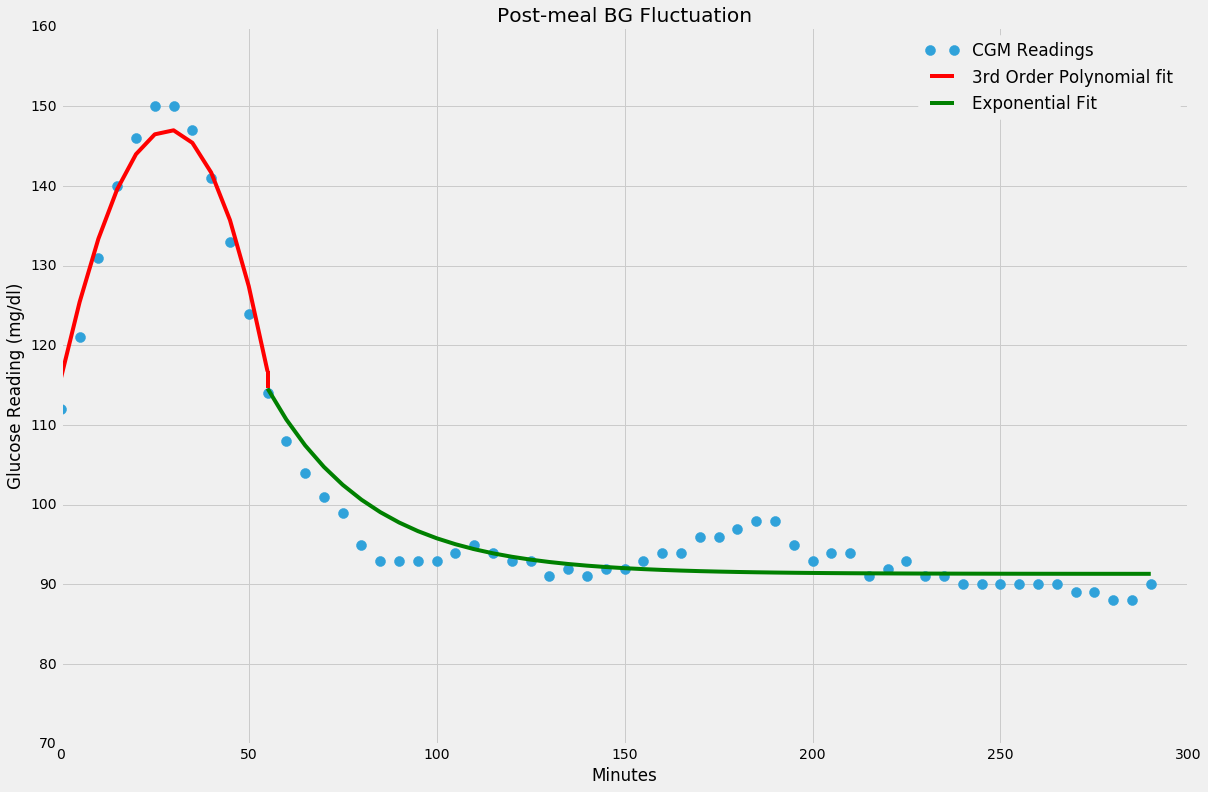

In [37]:
plt.figure(figsize=(18,12))
plt.xlim(xmax = 300, xmin = 0)
plt.ylim(ymax = 160, ymin = 70)
###############Curve fitting one polynomial### some variables are hard coded, to be changed to handle all signals
plot_indeces_all = map(lambda v : v * 5, range(len(df_all_plots_v2.iloc[1])))
single_row = df_all_plots_v2.iloc[1]
#print single_row
print "offset minutes until increase point:", offset_meal2increase[1]
plot_offset = (pre_recording_mins + offset_meal2increase[1])/5
print single_row[plot_offset:]

data2 = single_row[plot_offset:][~np.isnan(single_row[plot_offset:])]
#print "without nan", data2

data3 = single_row[plot_offset:(plot_offset+14)][~np.isnan(single_row[plot_offset:])]
#print "without nan", data3

plot_indeces = map(lambda v : v * 5, range(len(data3)))

plot_indeces2 = map(lambda v : v * 5, range(len(data2)))

p4 = np.poly1d(np.polyfit(plot_indeces, data3, deg=3))

# print "\nThe polynomial fitting the data is:\n\n",p1

plt.plot(plot_indeces2-offset_meal2increase[1],data2, '.', markersize=20, label ='CGM Readings') 
plt.plot(plot_indeces[:(plot_offset+10)]-offset_meal2increase[1], p4(plot_indeces[:(plot_offset+10)]), label ='3rd Order Polynomial fit', color = 'r', linewidth=4.0)

#plt.plot(plot_indeces_all[:(plot_offset+20)]-offset_meal2increase[1], p4(plot_indeces_all[:(plot_offset+20)]), label ='3rd Order Polynomial fit Extrapolation', linestyle='--')




############# Exponential line, hardcoded for example
peak_start_index1= (peak_elapsed_time[1]+pre_recording_mins)/5

a1 = df_P1_meals_w_deletion['Date'][1]
#print a
c1 = stop_plot_date[1]
#print c
signal_span1 = (c1 - a1).total_seconds()/60
        
row1 = (df_all_plots_v2.iloc[1])[peak_start_index1:int((signal_span1+pre_recording_mins)/5)+1]

print "peak index is", peak_start_index1

xaxis1 = row1.index.values
xdata1 = 1 + (xaxis1 - peak_elapsed_time[1])/5

#print "xaxis 1 is", xaxis1

#provide initial starting variables so it helps the curve fit to converge correctly and faster
popt, pcov = curve_fit(func, xdata1, row1, p0=[1, 1, 60])
plt.plot((xaxis1-pre_recording_mins)[6:], func(xdata1[6:], *popt), label ='Exponential Fit', color = 'g', linewidth=4.0)     

print "stop point of poly fit is", p4(plot_indeces[plot_offset+10]-offset_meal2increase[1])
print "stop point of expo fit fit is", func(xdata1[6], *popt)
print "x point is", (xaxis1-pre_recording_mins)[6]

plt.plot([(xaxis1-pre_recording_mins)[6], (xaxis1-pre_recording_mins)[6]], [p4(plot_indeces[plot_offset+10]-offset_meal2increase[1]), func(xdata1[6], *popt)],linewidth=4.0, color = 'r')


plt.xlabel('Minutes')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Post-meal BG Fluctuation'.format(after_reading)
plt.title(title)

plt.show()

offset minutes until increase point: 5
5      110.0
10     112.0
15     121.0
20     131.0
25     140.0
30     146.0
35     150.0
40     150.0
45     147.0
50     141.0
55     133.0
60     124.0
65     114.0
70     108.0
75     104.0
80     101.0
85      99.0
90      95.0
95      93.0
100     93.0
105     93.0
110     93.0
115     94.0
120     95.0
125     94.0
130     93.0
135     93.0
140     91.0
145     92.0
150     91.0
155     92.0
160     92.0
165     93.0
170     94.0
175     94.0
180     96.0
185     96.0
190     97.0
195     98.0
200     98.0
205     95.0
210     93.0
215     94.0
220     94.0
225     91.0
230     92.0
235     93.0
240     91.0
245     91.0
250     90.0
255     90.0
260     90.0
265     90.0
270     90.0
275     90.0
280     89.0
285     89.0
290     88.0
295     88.0
300     90.0
Name: 1, dtype: float64
without nan 5      110.0
10     112.0
15     121.0
20     131.0
25     140.0
30     146.0
35     150.0
40     150.0
45     147.0
50     141.0
55     133.0
60

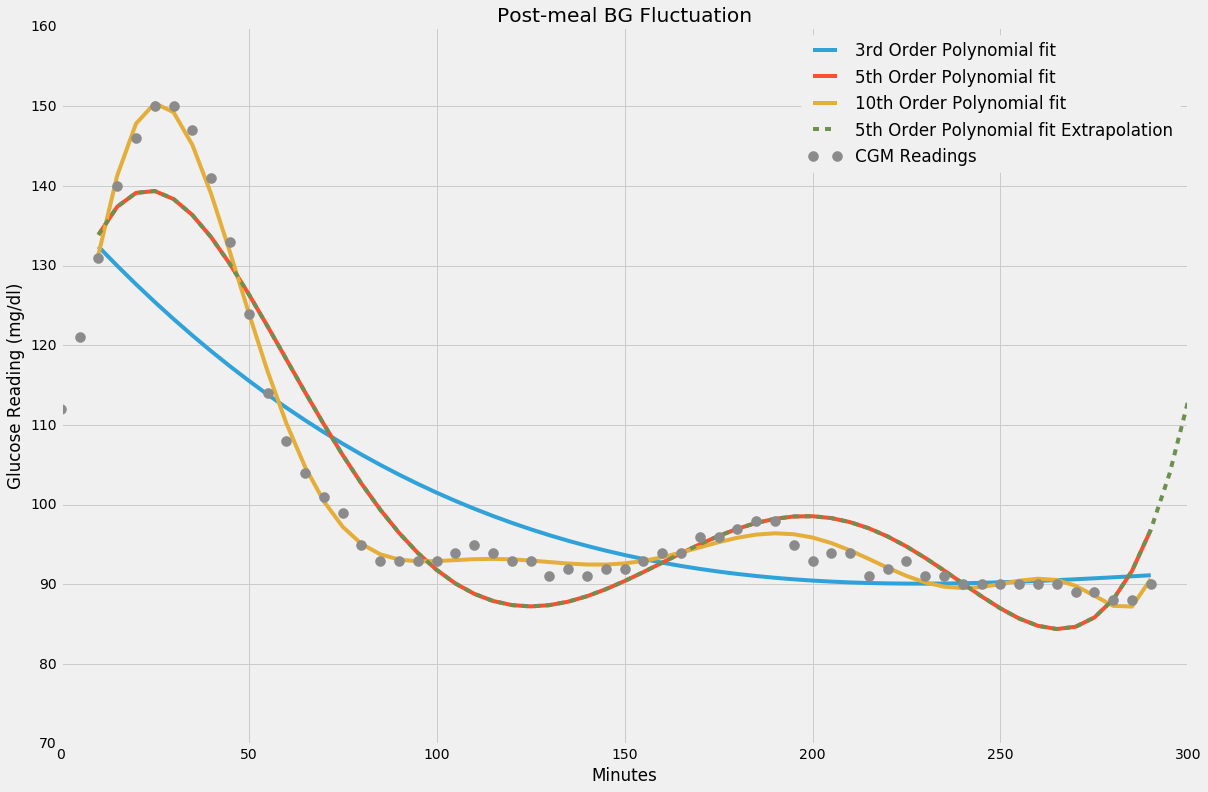

In [38]:
plt.figure(figsize=(18,12))
plt.xlim(xmax = 300, xmin = 0)
plt.ylim(ymax = 160, ymin = 70)
###############Curve fitting one polynomial### some variables are hard coded, to be changed to handle all signals
plot_indeces_all = map(lambda v : v * 5, range(len(df_all_plots_v2.iloc[1])))
single_row = df_all_plots_v2.iloc[1]
#print single_row
print "offset minutes until increase point:", offset_meal2increase[1]
plot_offset = (pre_recording_mins + offset_meal2increase[1])/5
print single_row[plot_offset:]

data2 = single_row[plot_offset:][~np.isnan(single_row[plot_offset:])]
print "without nan", data2

print "original length:", len(df_all_plots_v2.iloc[1])
print "new length:", len(data2)

plot_indeces = map(lambda v : v * 5, range(len(data2)))

p1 = np.poly1d(np.polyfit(plot_indeces, data2, deg=3))
p2 = np.poly1d(np.polyfit(plot_indeces, data2, deg=5))
p3 = np.poly1d(np.polyfit(plot_indeces, data2, deg=10))

print "\nThe polynomial fitting the data is:\n\n",p1


plt.plot(plot_indeces[plot_offset:]-offset_meal2increase[1], p1(plot_indeces[plot_offset:]), label ='3rd Order Polynomial fit')
plt.plot(plot_indeces[plot_offset:]-offset_meal2increase[1], p2(plot_indeces[plot_offset:]), label ='5th Order Polynomial fit')
plt.plot(plot_indeces[plot_offset:]-offset_meal2increase[1], p3(plot_indeces[plot_offset:]), label ='10th Order Polynomial fit')

plt.plot(plot_indeces_all[plot_offset:]-offset_meal2increase[1], p2(plot_indeces_all[plot_offset:]), label ='5th Order Polynomial fit Extrapolation', linestyle='--')

plt.plot(plot_indeces-offset_meal2increase[1],data2, '.', markersize=20, label ='CGM Readings') 

plt.xlabel('Minutes')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Post-meal BG Fluctuation'.format(after_reading)
plt.title(title)

plt.show()

In [39]:
#Dinner
Plot_extraction_v2(df_P1_meals_w_deletion, df_all_plots_v2)

breakfast_df = copy.deepcopy(df_all_plots_v2)
lunch_df = copy.deepcopy(df_all_plots_v2)
dinner_df = copy.deepcopy(df_all_plots_v2)

offset_breakfast2increase = copy.deepcopy(offset_meal2increase)
offset_lunch2increase = copy.deepcopy(offset_meal2increase)
offset_dinner2increase = copy.deepcopy(offset_meal2increase)

peak_elapsed_breakfast = copy.deepcopy(peak_elapsed_time)
peak_elapsed_lunch = copy.deepcopy(peak_elapsed_time)
peak_elapsed_dinner = copy.deepcopy(peak_elapsed_time)

breakfast_surrounding_lp_df = copy.deepcopy(surrounding_lowest_points_df)  
lunch_surrounding_lp_df = copy.deepcopy(surrounding_lowest_points_df) 
dinner_surrounding_lp_df = copy.deepcopy(surrounding_lowest_points_df) 

breakfast_peak_df = copy.deepcopy(peak_points_df)
lunch_peak_df = copy.deepcopy(peak_points_df)
dinner_peak_df = copy.deepcopy(peak_points_df)

breakfast_meals = []
breakfast_start_hour = 4
breakfast_max_hour = 10

lunch_meals = []
lunch_start_hour = 11
lunch_max_hour = 14

dinner_meals = []
dinner_start_hour = 16
dinner_max_hour = 23

remove_breakfast_x = []
remove_lunch_x = []
remove_dinner_x = []

for x in range(len(df_P1_meals_w_deletion)):
    a = df_P1_meals_w_deletion['Date'][x]
    meal_Date = df_P1.loc[df_P1['Date'] == a]['Date']
    meal_dt=meal_Date.values[0]
    mdt = datetime.datetime.utcfromtimestamp(meal_dt.astype('O')/(1e9))
    #print mdt.strftime('%H:%M:%S')
    meal_hr = mdt.strftime('%H')    
    #print int(meal_hr)
    if (int(meal_hr)>breakfast_max_hour or int(meal_hr)<breakfast_start_hour):
        #print "This does not belong to breakfast"
        #Drop all these data points that do not belong to breakfast period
        breakfast_meals.extend([x])
        remove_breakfast_x.append(x)
    
    if (int(meal_hr)>=lunch_max_hour or int(meal_hr)<lunch_start_hour):
        #print "This does not belong to breakfast"
        #Drop all these data points that do not belong to breakfast period
        lunch_meals.extend([x])    
        remove_lunch_x.append(x)
    
    if (int(meal_hr)>dinner_max_hour or int(meal_hr)<dinner_start_hour):
        #print "This does not belong to breakfast"
        #Drop all these data points that do not belong to breakfast period
        dinner_meals.extend([x])
        remove_dinner_x.append(x)

###############Breakfast
breakfast_df.drop(breakfast_df.index[breakfast_meals],axis=0,inplace=True)
breakfast_df = breakfast_df.reset_index(drop=True)  
print "This patient has", len(breakfast_df), "breakfast readings."

breakfast_surrounding_lp_df.drop(breakfast_surrounding_lp_df.index[breakfast_meals],axis=0,inplace=True)
breakfast_surrounding_lp_df = breakfast_surrounding_lp_df.reset_index(drop=True) 

####This is the implementation of distribution fitting, we take the difference of blood glucose levels at a certain time instance minus the bg at the time of the meal

#print_full(breakfast_df)

#the column 2 here represents the instance of the meal
#print breakfast_df[breakfast_df.columns[2]]

#print_full(breakfast_surrounding_lp_df['mg/dL'])

#the index (30/5)+2 = 8 represents the index at 30minutes
bg_difference = breakfast_df[breakfast_df.columns[35]] - breakfast_surrounding_lp_df['mg/dL']
print (bg_difference)

#########################

breakfast_peak_df.drop(breakfast_peak_df.index[breakfast_meals],axis=0,inplace=True)
breakfast_peak_df = breakfast_peak_df.reset_index(drop=True)

for i in range(len(remove_breakfast_x)):
    index = remove_breakfast_x[i]
    del offset_breakfast2increase[index-i]
    del peak_elapsed_breakfast[index-i]

###############Lunch
lunch_df.drop(lunch_df.index[lunch_meals],axis=0,inplace=True)
lunch_df = lunch_df.reset_index(drop=True)  
print "This patient has", len(lunch_df), "lunch readings."

lunch_surrounding_lp_df.drop(lunch_surrounding_lp_df.index[lunch_meals],axis=0,inplace=True)
lunch_surrounding_lp_df = lunch_surrounding_lp_df.reset_index(drop=True) 


# #the index (30/5)+2 = 8 represents the index at 30minutes
# bg_difference = lunch_df[lunch_df.columns[11]] - lunch_surrounding_lp_df['mg/dL']
# print (bg_difference)


lunch_peak_df.drop(lunch_peak_df.index[lunch_meals],axis=0,inplace=True)
lunch_peak_df = lunch_peak_df.reset_index(drop=True)

for i in range(len(remove_lunch_x)):
    index = remove_lunch_x[i]
    del offset_lunch2increase[index-i]
    del peak_elapsed_lunch[index-i]

###############Dinner
dinner_df.drop(dinner_df.index[dinner_meals],axis=0,inplace=True)
dinner_df = dinner_df.reset_index(drop=True) 
print "This patient has", len(dinner_df), "dinner readings."

dinner_surrounding_lp_df.drop(dinner_surrounding_lp_df.index[dinner_meals],axis=0,inplace=True)
dinner_surrounding_lp_df = dinner_surrounding_lp_df.reset_index(drop=True) 

# #the index (30/5)+2 = 8 represents the index at 30minutes
# bg_difference = dinner_df[dinner_df.columns[23]] - dinner_surrounding_lp_df['mg/dL']
# print (bg_difference)


dinner_peak_df.drop(dinner_peak_df.index[dinner_meals],axis=0,inplace=True)
dinner_peak_df = dinner_peak_df.reset_index(drop=True)

for i in range(len(remove_dinner_x)):
    index = remove_dinner_x[i]
    del offset_dinner2increase[index-i]
    del peak_elapsed_dinner[index-i]
    
#dinner_df.describe()
#print len(dinner_df)

#print_full (dinner_df)

#dinner_df.to_csv('Patient1_dinner_df.csv', sep='\t', encoding='utf-8')
dinner_df.to_csv('Patient1_dinner_df.csv', index=False)
lunch_df.to_csv('Patient1_lunch_df.csv', index=False)
breakfast_df.to_csv('Patient1_breakfast_df.csv', index=False)

This patient has 20 breakfast readings.
0    -17.0
1     -2.0
2      NaN
3     15.0
4     -5.0
5     12.0
6     -4.0
7      0.0
8     -1.0
9      NaN
10     2.0
11     0.0
12   -14.0
13   -15.0
14     NaN
15    -5.0
16    -7.0
17   -16.0
18    -4.0
19    -3.0
dtype: float64
This patient has 21 lunch readings.
This patient has 21 dinner readings.


without nan [-17.  -2.  15.  -5.  12.  -4.   0.  -1.   2.   0. -14. -15.  -5.  -7. -16.
  -4.  -3.]


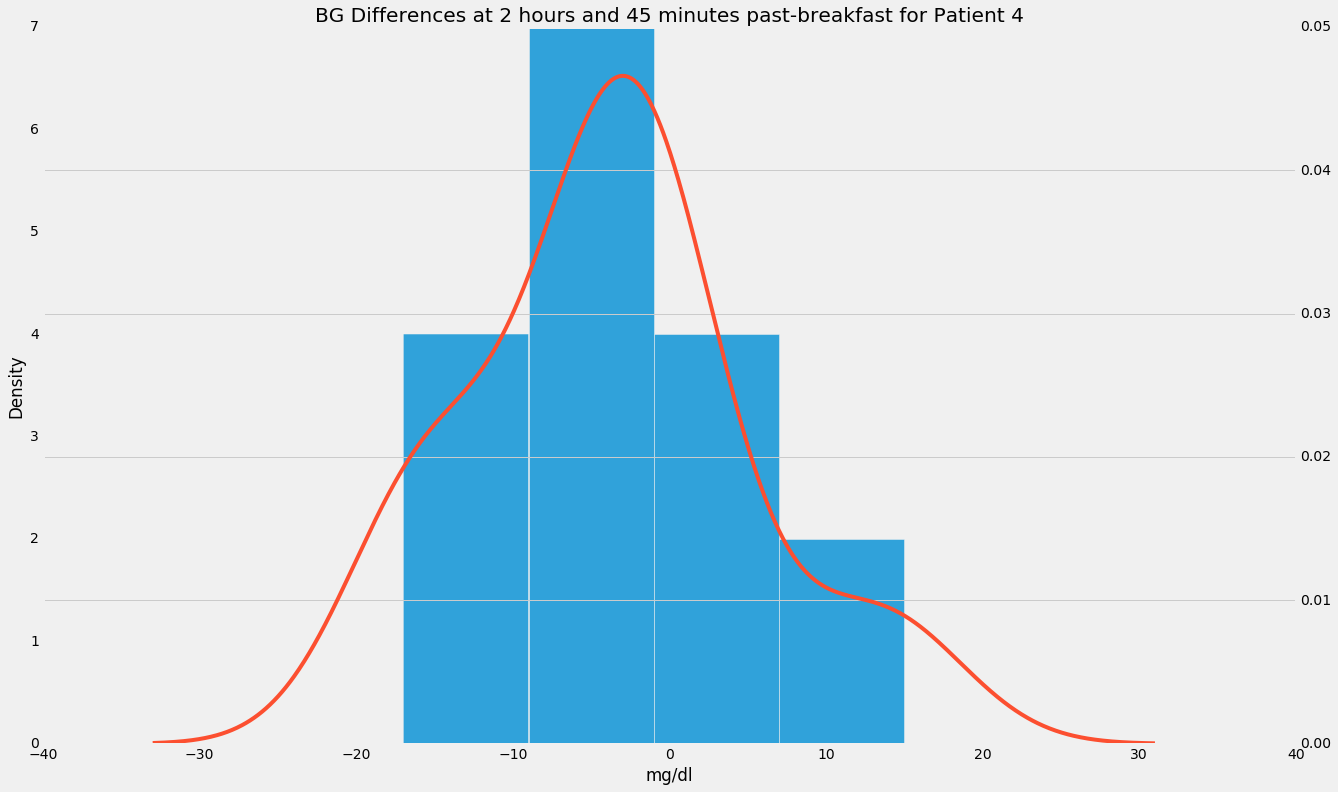

In [40]:
from scipy import stats
plt.figure(figsize=(20,12))
plt.xlabel('mg/dl')
plt.title('BG Differences at 2 hours and 45 minutes past-breakfast for Patient 4')

data = bg_difference
data = data[~np.isnan(data)]
print "without nan", data.as_matrix()

ax = data.plot(kind='hist', bins=4, range=(data.min(), data.max()))
data.plot(kind='kde', ax=ax, secondary_y=True)
#plt.hist(data, bins=6)
#data.plot(kind='density')
#plt.show()



In [41]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print "Package Versions:"
import sklearn; print "  scikit-learn:", sklearn.__version__
import scipy; print "  scipy:", scipy.__version__
import statsmodels; print "  statsmodels:", statsmodels.__version__

Package Versions:
  scikit-learn: 0.17.1
  scipy: 0.17.0
  statsmodels: 0.6.1


without nan [-17.  -2.  15.  -5.  12.  -4.   0.  -1.   2.   0. -14. -15.  -5.  -7. -16.
  -4.  -3.]
[-17.  -9.  -1.   7.  15.]


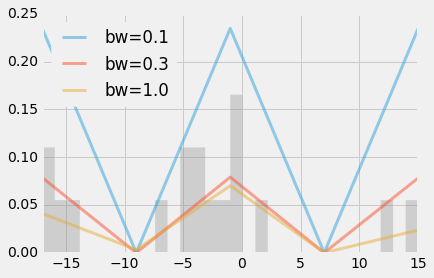

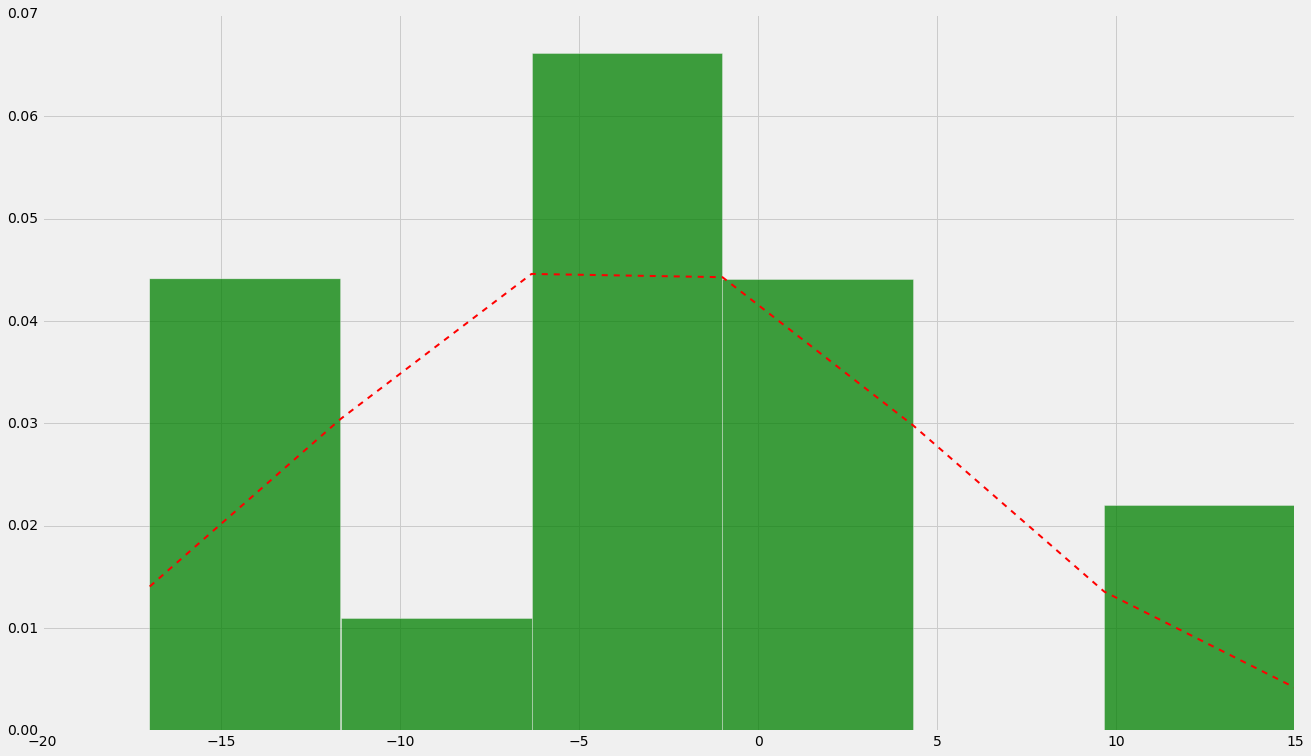

In [42]:
#Other ways of plotting distribution
data = data[~np.isnan(data)]
print "without nan", data.as_matrix()

from scipy.stats.distributions import norm
# The grid we'll use for plotting
x_grid = np.linspace(data.min(), data.max(), 5)

print x_grid

fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(data, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(data, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.set_xlim(data.min(), data.max())
ax.legend(loc='upper left')

plt.figure(figsize=(20,12))
import matplotlib.mlab as mlab
# best fit of data
(mu, sigma) = norm.fit(data)

# the histogram of the data
n, bins, patches = plt.hist(data, 6, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

The glucose mean at the time of recorded meals is: 110.380952381 mg/dL with a std of: 13.0596052001

The glucose mean at the time of lowest points surrounding the recorded meals is: 106.650793651 mg/dL with a std of: 12.2217068537

The time difference between recorded meals and the start of glucose increase is: -1.5873015873 minutes.


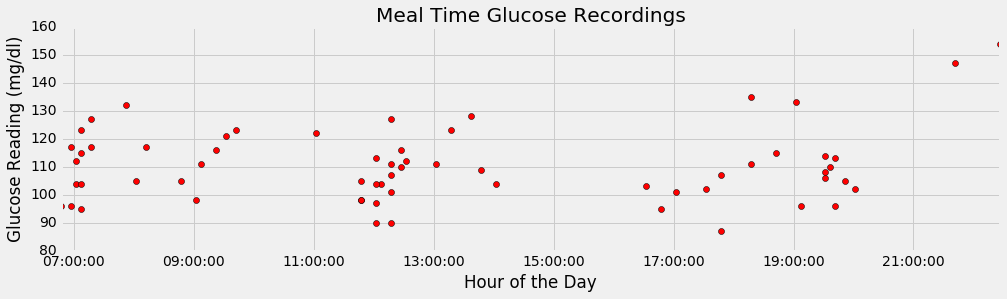

In [43]:
df_P1_all_clean_1day = copy.deepcopy(df_P1_meals_w_deletion)
df_1day_increasePoints = copy.deepcopy(surrounding_lowest_points_df)
df_1day_peakpoints = copy.deepcopy(peak_points_df)

d = datetime.datetime.today()
for i in range(len(df_P1_all_clean_1day)):
    dt = df_P1_all_clean_1day.Date[i].replace(year=d.year, month=d.month, day=d.day)    
    df_P1_all_clean_1day.Date[i] = dt

fig = plt.figure(figsize= (15,15))
plt.subplots_adjust(hspace=0.5)

sub1 = fig.add_subplot(311)
sub1.set_xlabel('Hour of the Day')
sub1.set_ylabel('Glucose Reading (mg/dl)')
sub1.set_title('Meal Time Glucose Recordings')
plt.plot_date(df_P1_all_clean_1day.Date, df_P1_all_clean_1day['mg/dL'], 'ro')    

#############
#Plotting all increase points in one day
# for i in range(len(df_1day_increasePoints)):
#     dt = df_1day_increasePoints.Date[i].replace(year=d.year, month=d.month, day=d.day)    
#     df_1day_increasePoints.Date[i] = dt    
    
# sub2 = fig.add_subplot(312)
# sub2.set_xlabel('Hour of the Day')
# sub2.set_ylabel('Glucose Reading (mg/dl)')
# sub2.set_title('Increase Points nearby meals')
# plt.plot_date(df_1day_increasePoints.Date, df_1day_increasePoints['mg/dL'], 'bo')

#############
#Plotting all peak points in one day
# for i in range(len(df_1day_peakpoints)):
#     dt = df_1day_peakpoints.Date[i].replace(year=d.year, month=d.month, day=d.day)    
#     df_1day_peakpoints.Date[i] = dt    
    
# sub3 = fig.add_subplot(313)
# sub3.set_xlabel('Hour of the Day')
# sub3.set_ylabel('Glucose Reading (mg/dl)')
# sub3.set_title('Increase Points nearby meals')
# plt.plot_date(df_1day_peakpoints.Date, df_1day_peakpoints['mg/dL'], 'go')


print "The glucose mean at the time of recorded meals is:", np.mean(df_P1_meals_w_deletion['mg/dL']), "mg/dL with a std of:", np.std(df_P1_meals_w_deletion['mg/dL'])

print "\nThe glucose mean at the time of lowest points surrounding the recorded meals is:", np.mean(surrounding_lowest_points_df['mg/dL']), "mg/dL with a std of:", np.std(surrounding_lowest_points_df['mg/dL'])


print "\nThe time difference between recorded meals and the start of glucose increase is:", np.mean(offset_meal2increase), "minutes."

plt.show()

In [44]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

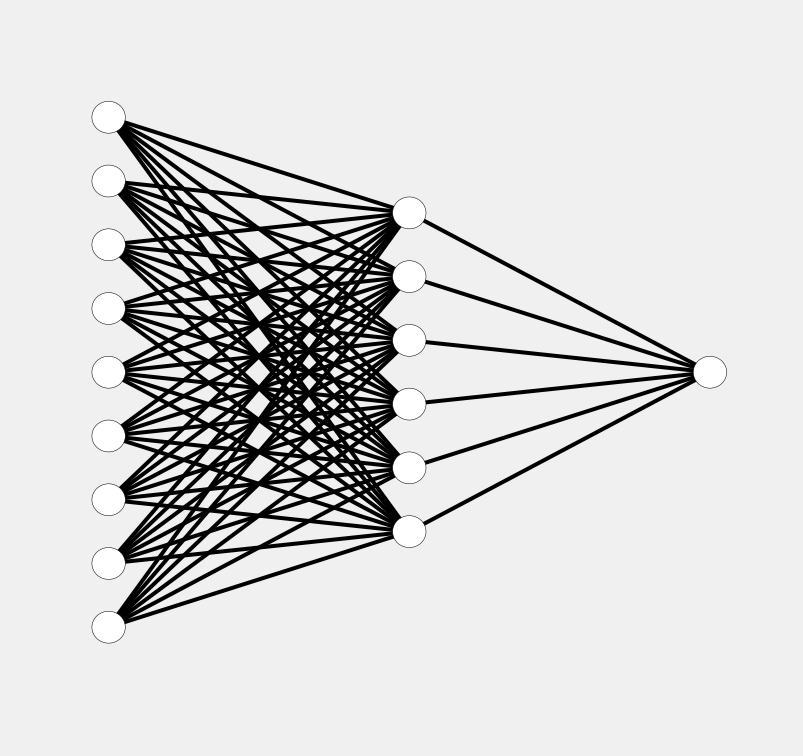

In [45]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [9, 6, 1])
fig.savefig('nn.png')